In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
# It tells the reshape function to infer the missing dimension size automatically based on 
#the total number of elements in the original array and the other specified dimensions (if any).
y_train = y_train.reshape(-1,) 

In [8]:
y_train 

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

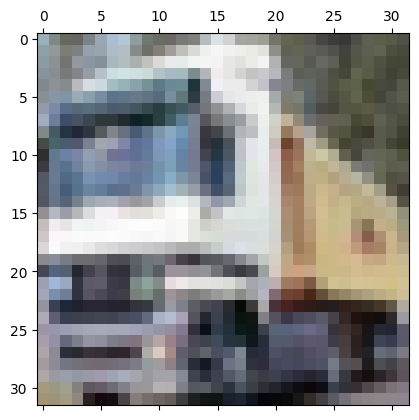

In [11]:
# view the image 
plt.matshow(X_train[1])

In [12]:
X_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [13]:
# normalize the values 
X_train = X_train / 255 
X_test = X_test / 255

In [14]:
X_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [16]:
# Artificial Neural Network for Image Classification 
# if y is one-hot encoded then use categorial_crossentropy otherwise if index use sparse_categorial_crossentropy
# softmax is used because of multi-classification problem. All probs add up to 1. Frog can be 0.75 and others can add up to be 0.25. 
ann = models.Sequential([

    layers.Flatten(input_shape=(32, 32, 3)), 
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax")
    
])

"""
Better Generalization: Recent research suggests SGD can lead to models
that perform better on unseen data (generalize better) compared to Adam [1]. This can be crucial for real-world applications.

Less Hyperparameter Tuning: SGD requires tuning the learning rate,
but Adam requires tuning the learning rate, beta1, and beta2. This can make SGD simpler to set up,
especially if you're new to machine learning.

Faster Training (Sometimes): SGD can be faster to train, especially 
for large datasets, if tuned well [2]. However, Adam often converges quickly initially.
"""
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2024-07-17 11:13:05.199610: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.8140 - accuracy: 0.3550
Epoch 2/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.6233 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5430 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4809 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4329 - accuracy: 0.4947


In [19]:
cnn = models.Sequential([
  
  layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)), 
  layers.MaxPooling2D((2, 2)), 

  layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),  

  layers.Flatten(), 
  layers.Dense(64, activation="relu"), 
  layers.Dense(10, activation="softmax") 
])


In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5533 - accuracy: 0.4355
Epoch 2/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1878 - accuracy: 0.5825
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0469 - accuracy: 0.6346
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9628 - accuracy: 0.6661
Epoch 5/5
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8946 - accuracy: 0.6891


In [22]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0059 - accuracy: 0.6562


[1.005904197692871, 0.6561999917030334]

In [23]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [25]:
y_pred[:5]

array([[4.63699340e-04, 1.05393345e-04, 5.75996153e-02, 5.70407569e-01,
        4.20721108e-03, 1.85457066e-01, 1.62718043e-01, 5.59013570e-04,
        1.83973778e-02, 8.50104116e-05],
       [7.89040048e-03, 4.38439548e-02, 1.97503774e-04, 8.01090391e-06,
        1.91576164e-05, 1.86482126e-07, 3.08509311e-06, 4.41051043e-06,
        9.28978622e-01, 1.90546270e-02],
       [4.15391102e-02, 7.21480474e-02, 1.27845239e-02, 1.22793764e-02,
        5.68607030e-03, 3.66601249e-04, 1.58245151e-03, 1.69038470e-03,
        8.26799393e-01, 2.51240637e-02],
       [7.26657987e-01, 6.54458851e-02, 3.55975926e-02, 1.28757639e-03,
        8.88385251e-03, 4.31790831e-05, 1.05427960e-02, 3.87721142e-04,
        1.47429571e-01, 3.72381276e-03],
       [1.03149123e-05, 2.84931662e-06, 2.02497635e-02, 2.51113698e-02,
        3.07078063e-01, 1.11050745e-02, 6.36284173e-01, 1.42211662e-04,
        1.33593521e-05, 2.76966534e-06]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]

In [31]:
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [30]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)